# ZMLP Search and Display

In [1]:
from boonsdk import app_from_env
from boonsdk.search import SimilarityQuery
from boonlab.display import show_asset, show_thumbnails
from boonlab.pandas import search_to_df
from boonlab.proxies import download_proxy

import pprint
import pandas as pd

## Connect

In [2]:
app = app_from_env()


## Display first 20 assets

In [3]:
search = app.assets.search({"size": 20})

images_list = show_thumbnails(search)

## Look at one asset by index

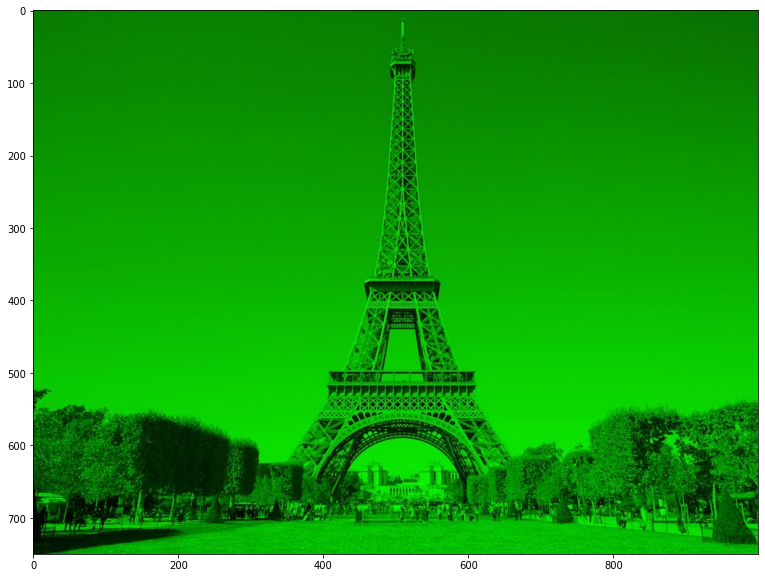

{'analysis': {'boonai-image-similarity': {'simhash': 'APPMPJPLPPAEPODJBDPAOECOPHOPJFPPBPAPPBPPKGBPPPBPPPPPDIIPPFNKJDPPOGCPJPPCCENPOPPPDCPBGPPIPEPLPAJMOPMPGBJAPCPGHHEFPLFBGBFPPDMPPFIPPPHPGPJGPLPPMBJPFFPLLCPIMOBCHCKCOPPPPCFPHJPAHEFDPPKPBPCPIPIPPPFBPGEAHFEACPACPPPPPPIPPPEPHONCDHFDPCPBCFPPHOLCPOIPCCLHDHLPPPPPPLHHFPKPCPPPPPLPPBGBABHCABFPBLGEPPPPHDAECPPPPPAPIBBAAOOBPAAKPIPIFGPDIPPCIPOPPKGDFPMPGPPLPIEPHFEPCCPAGIFPMEJPMMHHFOHHPLGABCGPKPEHPFBIPOGPPEBPPPPAEPFHKKFPCGPEPIPAAHPPBIPDOMPBDGCPKMPKKPPLJELIJPKDPAPENGAPPGPPPPPAAMPPLHHPAPAPPGOBPPEPPPFGPPPPPPNPJPHPPEGPDDPCNAKONCDDPPPCCBPBGPBCDPOHCPPPPPPEFHPPHDDPPNBPGPPFPEPOICPJLPCKPPMPAFCKPPCHIPPLMPPBPODAOPCPKCFPPPPBBNBPFBJJBPPPPGANPPNIPPOAAPOPPPEPCPPMPEFPDPOPGMBGGEFPBKDMLPPPOOHAPLKPPBNIBPPPIBEDPHPDIILGPKPPPKCPPMOFLPCIHPGPPBPPPPFPPPNPNPAELPNIPKIFABHPPECEGIOPPPADPAPICLPCBPFPBHPPMGPICFPPPKLNCPEPOAPNBGPBKIAOCENCJPPAFDPOGPPMFPPPIAHAOAPGHHPDPPPPGIFFIPCPLPHPCPPPPPPPPPPGOIJKCPPCPPKPJPPOPDPBOPNGAJIAAPAOPPPPPLPIPPACPPPOMEHPDLFHKGAHBPICIBOPPPPEFJPKOCKDMPPPPKEPBGKPPL

In [4]:
asset = search[2]

document = show_asset(asset)

pprint.pprint(document)

# Get pandas dataframe

In [8]:
len(document['analysis']['boonai-image-similarity']['simhash'])

2048

In [14]:
# these attributes can be changed to whichever you want
attrs = ['analysis.zvi-image-similarity', 'analysis.zvi-object-detection']

df_search = search_to_df(search=search, attrs=attrs)

In [27]:
# uncomment to remove truncating for dataframes
# pd.set_option('max_colwidth', -1)

df_search.head()

,source.filename,analysis.zvi-image-similarity,analysis.zvi-object-detection
0,20190923-R0003479-Edit-960x636.jpg,"{'type': 'similarity', 'simhash': 'MPPPDGEKMPDAPCHKPNMGPIPIOGPIPPEPIFDPFHDEPGPPPPPJHLBPPPLPPPBMN...","{'type': 'labels', 'count': 9, 'predictions': [{'label': 'person', 'score': 0.999, 'bbox': [0.02..."
1,20170929-DSC04241-Edit-960x640.jpg,"{'type': 'similarity', 'simhash': 'BDMCGLPLBPFDPDPMHCPFPBHPDNHMPBPPCPEPPPPPPDFFPPEBCAENDNDPPBKPB...","{'type': 'labels', 'count': 16, 'predictions': [{'label': 'person', 'score': 0.995, 'bbox': [0.2..."
2,20200105-R0003703-960x636.jpg,"{'type': 'similarity', 'simhash': 'KPPPPGHPPPPEPPCPPPPHPNPCFPHPPDDPDPFDPFHPPHPMPPEPMPPPBPFPPAPPP...","{'type': 'labels', 'count': 4, 'predictions': [{'label': 'person', 'score': 0.999, 'bbox': [0.13..."
3,20190912-R0003228-Edit-960x636.jpg,"{'type': 'similarity', 'simhash': 'HPOPAOGJGPFGPODIPIOHFGPKBDPJPOBPFPOPDMAFEKPPIEPDHOEPPPKPFPBCH...","{'type': 'labels', 'count': 10, 'predictions': [{'label': 'chair', 'score': 0.993, 'bbox': [0.60..."
4,20190919-DSC07222-Edit-960x640.jpg,"{'type': 'similarity', 'simhash': 'PPOLHCPLPPJLIBGPGLCAKHDOHKPJPCFPPPFPFAKPPPPAPPFPFPCPEPGPPBPPE...","{'type': 'labels', 'count': 6, 'predictions': [{'label': 'person', 'score': 0.987, 'bbox': [0.56..."


## Do a similarity search

In [10]:
h = asset.document['analysis']['zvi-image-similarity']['simhash']

min_score = 0.75

q = {
    "query": {
        "bool": {
            "must": [
                SimilarityQuery(h)
            ]
        }
    }
}



search = app.assets.search(q)

show_thumbnails(search)

['tmp/SSUdTZgqTuoOHuMMFOU4FVtx1lBAO5zw.jpg']